<a href="https://colab.research.google.com/github/geekysydney/code-unza15-CSC-4792-project-team-15-repository-for-project-team-15/blob/main/code_unza25_csc4792_project_team_15_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

  <font size=6><b>CSC 4792: Data Mining and Warehousing</b></font><br />
  <font size=5><b>Jupyter Notebook for the Journal of Law and Social Sciences article classifier model</b></font>

  
  Project Team #15 Members:</br> 1. Sydney Mulando</br> 2. Mambwe Chilebela</br> 3. Harrison Mwewa </br> 4. Goodson Mumbelunga</br> 5. Apollos Mwaba. </br>
  

</center>

#1.Business Understanding
##1.1 Introduction
The Journal of Law and Social Sciences publishes articles spanning multiple disciplines of both law and social sciences. Some of the Law disciplines include Civic Law, Criminal Law, Constitutional Law, Sociology of Law, Public Policy, Criminology, Legal Theory, and many others. While the other disciplines in Social Studies include Political Science, Economics, Sociology, Gender Studies, Cultural Studies, and also many others. Categorization of journals into their specific discipline is currently manual and inconsistent, which makes see search, browsing, and content recommendation inefficient. This project will develop an automatic text classification system (model) that predicts an article’s discipline from its title and abstract, improving discoverability and reducing editorial effort.

##1.2 Business Objectives
Primary objectives:

Automate classification of journal articles into discipline categories to speed up editorial workflows and enhance content discovery.

Success at this stage means producing a prototype that demonstrates that article titles and abstracts can be used to predict the correct discipline with a level of accuracy 75%, but may be improved after further iterations. The exact performance threshold  will be confirmed once more requirements are clarified.

##1.3 Data Mining Goals
Build an initial supervised classification model that can assign one of the predefined disciplines to a given journal article, using only its title and abstract as input features.

Document and evaluate preprocessing and modeling choices to ensure results are reproducible and explainable.

These goals may be adjusted once the available data is fully understood.

## 1.4 Initial Success Criteria
Given that this is an early-stage CRISP-DM Business Understanding phase:

Initial Iteration: The model should demonstrate and show clear potential for improvement. As an initial target, an accuracy of ≥ 70%  would indicate feasibility.

Long-term Success: Once project requirements are fully defined, the target metrics will be refined to match editorial expectations e.g 85% accuracy

Success will also be measured by stakeholder feedback on the interpretability of the results and the usefulness of the proposed classification output.


## 1.5 Assumptions and Risks

We assume access to a fully labeled dataset of articles (titles, abstracts, and discipline labels).

The exact number of examples per class and the overall class distribution are unknown and could affect model choice.

Labels may be highly subjective, potentially leading to some overlap between disciplines.

Limited available labeled data could require extensive manual labeling to expand the dataset before modeling.

## 1.6 Next Steps

1. Confirm scope and requirements with team members </br>
2. Assess data availability </br>
3. confirm the size </br>
4. quality </br>
5. completeness of the dataset.</br>
6. Proceed to Data Understanding phase (perform exploratory data analysis to examine class balance, text length, and potential preprocessing needs.)

In [ ]:
!Here is a link to our repository https://github.com/geekysydney/code-unza15-CSC-4792-project-team-15-repository-for-project-team-15.git



fatal: destination path 'code-unza15-CSC-4792-project-team-15-repository-for-project-team-15' already exists and is not an empty directory.


#2. Data Understanding


##2.1 Data Collection

The dataset will be sourced from the Journal of Law and Social Sciences (JLSS) hosted on the University of Zambia's journal platform.
We will manually or programmatically extract the following fields for each article:

1. Title – short summary of the research.

2. Abstract – extended summary providing context, methodology, and findings.

3. Discipline – the category/field assigned to the article (target variable).

Expected Disciplines (examples, may vary depending on actual data):

1. Law

2. Political Science

3. Sociology

4. conomics

5. Development Studies

6. International Relations

##2.2 Data Entry
Using a variety of scripts, we are going to retrieve the data necessary for creating a csv file that we will then use to analyze the contents of the JLSS.</br>

We begin with mounting our google drive and pulling all the content in our shared folder. We are doing this so that changes to the dataset are seen and applied to everyone using the dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#Pull all folders in the drive
!pip install gdown
import gdown

gdown.download_folder("https://drive.google.com/drive/folders/1B9Bxg58zs_RWGJ-0QR5-EpGyg6NTVD50?usp=drive_link", quiet=False, use_cookies=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Retrieving folder contents


Processing file 1buSf5TT9KbDICSrGmvXsFq_adKhiQZFj code-unza25-csc4792- project_team_15-notebook.ipynb
Processing file 1M_96p_CcoGqnp4dz8Sl4Rllwi3unfoU3 jlss_titles_and_abstracts.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1buSf5TT9KbDICSrGmvXsFq_adKhiQZFj
To: /content/misc-unza25-csc4792-project_team15/code-unza25-csc4792- project_team_15-notebook.ipynb
100%|██████████| 157k/157k [00:00<00:00, 5.15MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M_96p_CcoGqnp4dz8Sl4Rllwi3unfoU3
To: /content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts.csv
100%|██████████| 137k/137k [00:00<00:00, 3.69MB/s]
Download completed


['/content/misc-unza25-csc4792-project_team15/code-unza25-csc4792- project_team_15-notebook.ipynb',
 '/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts.csv']

####2.2.1. WEB SCRAPING ALL URLs OF JOURNAL ISSUES (ARTICLES) TO GET TITLES FOR ARTICLES IN EACH JOURNAL FOR OUR DATASET
Here, we begin with listing all the URLs for the many published issues of the JLSS. Each year, the JLSS publishes 4 issues, and it is currently at Vol 6 issue 2.
After listing the URLs, the output of the script is all the titles of the articles for each journal issue.


In [ ]:
import requests
from bs4 import BeautifulSoup

# List of all URLs of journal issues(articles) we want to scrape
urls = [
   'https://journals.unza.zm/index.php/JLSS/issue/view/132',
'https://journals.unza.zm/index.php/JLSS/issue/view/125',
'https://journals.unza.zm/index.php/JLSS/issue/view/123',
'https://journals.unza.zm/index.php/JLSS/issue/view/119',
'https://journals.unza.zm/index.php/JLSS/issue/view/111',
'https://journals.unza.zm/index.php/JLSS/issue/view/89',
'https://journals.unza.zm/index.php/JLSS/issue/view/46',
'https://journals.unza.zm/index.php/JLSS/issue/view/45',
'https://journals.unza.zm/index.php/JLSS/issue/view/44',
'https://journals.unza.zm/index.php/JLSS/issue/view/43',
'https://journals.unza.zm/index.php/JLSS/issue/view/54',
'https://journals.unza.zm/index.php/JLSS/issue/view/47',
'https://journals.unza.zm/index.php/JLSS/issue/view/53'

]

all_titles = []

headers = {
    "User-Agent": "Mozilla/5.0"
}

for url in urls:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        article_divs = soup.find_all("div", class_="obj_article_summary")
        titles = [div.find("a").get_text(strip=True) for div in article_divs]
        all_titles.append({url: titles})
    else:
        print(f"Failed to retrieve {url}")

# Print out collected titles for each URL
for item in all_titles:
    for url, titles in item.items():
        print(f"Titles from {url}:")
        for i, title in enumerate(titles, 1):
            print(f"{i}. {title}")
        print("\n")


Titles from https://journals.unza.zm/index.php/JLSS/issue/view/132:
1. Editorial Comment
2. Some Novels are Novels While Others are Not: Carnivalesque and Contemporaneity in Dambudzo Marechera's House of Hunger
3. Contradictions of a Society in Transition: A Look at Henry Musenge's Novel Changing Shadows
4. Unravelling the Complexity of Cinyanja Compound Words: A Distributed Morphology Approach
5. The Naming of Zambia's Waterfalls: A Test Case in Critical Toponymy
6. Intercultural Communication Practices in Chinese Firms in Lusaka, Zambia: Perspectives of Zambian Employees
7. The Resemiotisation and Intertextuality of Multimodal Discourses in Linguistic Landscape of Public Service Vehicles in Lusaka, Zambia


Titles from https://journals.unza.zm/index.php/JLSS/issue/view/125:
1. Complicating the Language of Conventional Nigerian Narratives: The Poetics of the Language Ofokri’s Narratives.
2. Evaluating the Key Roles of Contract Administrators in the Zambian Construction Industry
3. Wha

####2.2.2. GETTING PDF LINKS FROM JOURNAL ISSUE (ARTICLE) URLs
Next, we are getting the PDF links for each of the articles so we can be able to extract the data in each article.

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def get_pdf_links(issue_url):
    """
    Given a journal issue URL, scrape and return a list of unique PDF links found on the page.
    Handles links where '.pdf' appears anywhere in the URL or link text mentions pdf/download.
    """
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(issue_url, headers=headers)
    if response.status_code != 200:
        print(f"Failed to retrieve {issue_url} (status code {response.status_code})")
        return []

    soup = BeautifulSoup(response.content, "html.parser")
    pdf_links = []

    for a in soup.find_all('a', href=True):
        href = a['href']
        text = a.get_text(strip=True).lower()
        href_lower = href.lower()

        if ('.pdf' in href_lower) or ('pdf' in text) or ('download' in text):
            full_url = urljoin(issue_url, href)
            pdf_links.append(full_url)

    # Remove duplicates while preserving order
    seen = set()
    unique_pdf_links = []
    for link in pdf_links:
        if link not in seen:
            seen.add(link)
            unique_pdf_links.append(link)

    return unique_pdf_links


# List of Journal article URLs to scrape PDF links from
issue_urls = [
    "https://journals.unza.zm/index.php/JLSS/issue/view/132",
    "https://journals.unza.zm/index.php/JLSS/issue/view/125",
    "https://journals.unza.zm/index.php/JLSS/issue/view/123",
    "https://journals.unza.zm/index.php/JLSS/issue/view/119",
    "https://journals.unza.zm/index.php/JLSS/issue/view/111",
    "https://journals.unza.zm/index.php/JLSS/issue/view/89",
    "https://journals.unza.zm/index.php/JLSS/issue/view/46",
    "https://journals.unza.zm/index.php/JLSS/issue/view/45",
    "https://journals.unza.zm/index.php/JLSS/issue/view/44",
    "https://journals.unza.zm/index.php/JLSS/issue/view/43",
    "https://journals.unza.zm/index.php/JLSS/issue/view/54",
    "https://journals.unza.zm/index.php/JLSS/issue/view/47",
    "https://journals.unza.zm/index.php/JLSS/issue/view/53"
]

# Dictionary to hold pdf links per issue URL
all_pdf_links = {}

for url in issue_urls:
    pdfs = get_pdf_links(url)
    all_pdf_links[url] = pdfs
    print(f"Issue URL: {url} - Found {len(pdfs)} PDF links:")
    for pdf_link in pdfs:
        print(f"  {pdf_link}")
    print("\n")


Issue URL: https://journals.unza.zm/index.php/JLSS/issue/view/132 - Found 7 PDF links:
  https://journals.unza.zm/index.php/JLSS/article/view/1295/922
  https://journals.unza.zm/index.php/JLSS/article/view/1297/923
  https://journals.unza.zm/index.php/JLSS/article/view/1298/924
  https://journals.unza.zm/index.php/JLSS/article/view/1299/925
  https://journals.unza.zm/index.php/JLSS/article/view/1300/926
  https://journals.unza.zm/index.php/JLSS/article/view/1301/927
  https://journals.unza.zm/index.php/JLSS/article/view/1313/933


Issue URL: https://journals.unza.zm/index.php/JLSS/issue/view/125 - Found 5 PDF links:
  https://journals.unza.zm/index.php/JLSS/article/view/1205/885
  https://journals.unza.zm/index.php/JLSS/article/view/1201/881
  https://journals.unza.zm/index.php/JLSS/article/view/1202/882
  https://journals.unza.zm/index.php/JLSS/article/view/1203/883
  https://journals.unza.zm/index.php/JLSS/article/view/1204/884


Issue URL: https://journals.unza.zm/index.php/JLSS/iss

####2.2.3. The script downloads PDFs from given article URLs, extracts the abstract text using PyMuPDF, and saves the results in a CSV file.
The CSV file produced only contains contents of the abstracts of the JLSS.

In [ ]:
!pip install pymupdf


import requests
import fitz  # PyMuPDF
import pandas as pd
import time

# Headers to mimic a real browser
HEADERS = {"User-Agent": "Mozilla/5.0"}

def get_pdf_link(article_view_url):
    """Convert article view URL to PDF download URL."""
    if "/view/" in article_view_url:
        return article_view_url.replace("/view/", "/download/")
    return None

def download_pdf(pdf_url):
    """Download PDF and return bytes, or None if failed."""
    try:
        response = requests.get(pdf_url, headers=HEADERS, timeout=20)
        if response.status_code == 200 and 'application/pdf' in response.headers.get('Content-Type', ''):
            return response.content
        else:
            print(f"[ERROR] Failed to download PDF: {pdf_url} (Status: {response.status_code})")
            return None
    except requests.exceptions.RequestException as e:
        print(f"[ERROR] Request error for {pdf_url}: {e}")
        return None

def extract_abstract_from_pdf(pdf_bytes):
    """Extract abstract text from first 3 pages of PDF."""
    try:
        doc = fitz.open(stream=pdf_bytes, filetype="pdf")
    except Exception as e:
        return f"[ERROR] Failed to open PDF: {e}"

    abstract_text = ""
    for page_num in range(min(3, len(doc))):
        page = doc[page_num]
        text = page.get_text()
        lower_text = text.lower()

        if "abstract" in lower_text:
            start_index = lower_text.find("abstract")
            text_after_abstract = text[start_index:]

            # Define markers that may indicate the end of the abstract
            end_markers = ["introduction", "keywords", "\n\n", "\n\n\n", "\n1.", "\n\\section"]
            end_positions = []
            for marker in end_markers:
                pos = text_after_abstract.lower().find(marker)
                if pos != -1:
                    end_positions.append(pos)

            if end_positions:
                end_index = min(end_positions)
                abstract_text = text_after_abstract[:end_index].strip()
            else:
                abstract_text = text_after_abstract.strip()
            break

    return abstract_text if abstract_text else "Abstract not found"

# Full list of article view URLs
article_view_urls = [
    "https://journals.unza.zm/index.php/JLSS/article/view/1295/922",
    "https://journals.unza.zm/index.php/JLSS/article/view/1297/923",
    "https://journals.unza.zm/index.php/JLSS/article/view/1298/924",
    "https://journals.unza.zm/index.php/JLSS/article/view/1299/925",
    "https://journals.unza.zm/index.php/JLSS/article/view/1300/926",
    "https://journals.unza.zm/index.php/JLSS/article/view/1301/927",
    "https://journals.unza.zm/index.php/JLSS/article/view/1313/933",
    "https://journals.unza.zm/index.php/JLSS/article/view/1205/885",
    "https://journals.unza.zm/index.php/JLSS/article/view/1201/881",
    "https://journals.unza.zm/index.php/JLSS/article/view/1202/882",
    "https://journals.unza.zm/index.php/JLSS/article/view/1203/883",
    "https://journals.unza.zm/index.php/JLSS/article/view/1204/884",
    "https://journals.unza.zm/index.php/JLSS/article/view/1161/868",
    "https://journals.unza.zm/index.php/JLSS/article/view/1162/867",
    "https://journals.unza.zm/index.php/JLSS/article/view/1163/866",
    "https://journals.unza.zm/index.php/JLSS/article/view/1164/865",
    "https://journals.unza.zm/index.php/JLSS/article/view/1165/864",
    "https://journals.unza.zm/index.php/JLSS/article/view/1166/863",
    "https://journals.unza.zm/index.php/JLSS/article/view/1124/839",
    "https://journals.unza.zm/index.php/JLSS/article/view/1125/843",
    "https://journals.unza.zm/index.php/JLSS/article/view/1086/840",
    "https://journals.unza.zm/index.php/JLSS/article/view/1126/842",
    "https://journals.unza.zm/index.php/JLSS/article/view/919/841",
    "https://journals.unza.zm/index.php/JLSS/article/view/1009/767",
    "https://journals.unza.zm/index.php/JLSS/article/view/1010/768",
    "https://journals.unza.zm/index.php/JLSS/article/view/1011/769",
    "https://journals.unza.zm/index.php/JLSS/article/view/1012/770",
    "https://journals.unza.zm/index.php/JLSS/article/view/1013/771",
    "https://journals.unza.zm/index.php/JLSS/article/view/789/656",
    "https://journals.unza.zm/index.php/JLSS/article/view/790/658",
    "https://journals.unza.zm/index.php/JLSS/article/view/791/657",
    "https://journals.unza.zm/index.php/JLSS/article/view/792/655",
    "https://journals.unza.zm/index.php/JLSS/article/view/793/654",
    "https://journals.unza.zm/index.php/JLSS/article/view/767/636",
    "https://journals.unza.zm/index.php/JLSS/article/view/768/635",
    "https://journals.unza.zm/index.php/JLSS/article/view/769/634",
    "https://journals.unza.zm/index.php/JLSS/article/view/770/633",
    "https://journals.unza.zm/index.php/JLSS/article/view/771/632",
    "https://journals.unza.zm/index.php/JLSS/article/view/757/625",
    "https://journals.unza.zm/index.php/JLSS/article/view/758/626",
    "https://journals.unza.zm/index.php/JLSS/article/view/759/627",
    "https://journals.unza.zm/index.php/JLSS/article/view/760/628",
    "https://journals.unza.zm/index.php/JLSS/article/view/761/629",
    "https://journals.unza.zm/index.php/JLSS/article/view/469/414",
    "https://journals.unza.zm/index.php/JLSS/article/view/468/413",
    "https://journals.unza.zm/index.php/JLSS/article/view/467/405",
    "https://journals.unza.zm/index.php/JLSS/article/view/470/416",
    "https://journals.unza.zm/index.php/JLSS/article/view/382/350",
    "https://journals.unza.zm/index.php/JLSS/article/view/381/347",
    "https://journals.unza.zm/index.php/JLSS/article/view/386/349",
    "https://journals.unza.zm/index.php/JLSS/article/view/384/348",
    "https://journals.unza.zm/index.php/JLSS/article/view/443/390",
    "https://journals.unza.zm/index.php/JLSS/article/view/472/430",
    "https://journals.unza.zm/index.php/JLSS/article/view/442/394",
    "https://journals.unza.zm/index.php/JLSS/article/view/450/396",
    "https://journals.unza.zm/index.php/JLSS/article/view/448/397",
    "https://journals.unza.zm/index.php/JLSS/article/view/452/399",
    "https://journals.unza.zm/index.php/JLSS/article/view/447/398",
    "https://journals.unza.zm/index.php/JLSS/article/view/454/401",
    "https://journals.unza.zm/index.php/JLSS/article/view/444/400",
    "https://journals.unza.zm/index.php/JLSS/article/view/446/428",
    "https://journals.unza.zm/index.php/JLSS/article/view/449/391",
    "https://journals.unza.zm/index.php/JLSS/article/view/451/392",
    "https://journals.unza.zm/index.php/JLSS/article/view/453/393",
    "https://journals.unza.zm/index.php/JLSS/article/view/445/395",
    "https://journals.unza.zm/index.php/JLSS/article/view/440/379",
    "https://journals.unza.zm/index.php/JLSS/article/view/436/378",
    "https://journals.unza.zm/index.php/JLSS/article/view/431/386",
    "https://journals.unza.zm/index.php/JLSS/article/view/430/387",
    "https://journals.unza.zm/index.php/JLSS/article/view/433/385",
    "https://journals.unza.zm/index.php/JLSS/article/view/432/388",
    "https://journals.unza.zm/index.php/JLSS/article/view/438/389",
    "https://journals.unza.zm/index.php/JLSS/article/view/435/380",
    "https://journals.unza.zm/index.php/JLSS/article/view/393/351",
    "https://journals.unza.zm/index.php/JLSS/article/view/439/384",
    "https://journals.unza.zm/index.php/JLSS/article/view/437/377",
    "https://journals.unza.zm/index.php/JLSS/article/view/471/429",
    "https://journals.unza.zm/index.php/JLSS/article/view/365/329",
    "https://journals.unza.zm/index.php/JLSS/article/view/362/345",
    "https://journals.unza.zm/index.php/JLSS/article/view/366/331",
    "https://journals.unza.zm/index.php/JLSS/article/view/372/327",
    "https://journals.unza.zm/index.php/JLSS/article/view/373/326",
    "https://journals.unza.zm/index.php/JLSS/article/view/361/344",
    "https://journals.unza.zm/index.php/JLSS/article/view/364/330",
    "https://journals.unza.zm/index.php/JLSS/article/view/368/325",
    "https://journals.unza.zm/index.php/JLSS/article/view/369/324",
    "https://journals.unza.zm/index.php/JLSS/article/view/367/328",
]

results = []
for i, article_url in enumerate(article_view_urls, start=1):
    print(f"[{i}/{len(article_view_urls)}] Processing: {article_url}")
    pdf_url = get_pdf_link(article_url)
    if not pdf_url:
        results.append({"article_url": article_url, "pdf_url": None, "abstract": "No PDF URL"})
        continue

    pdf_bytes = download_pdf(pdf_url)
    if pdf_bytes:
        abstract = extract_abstract_from_pdf(pdf_bytes)
    else:
        abstract = "Failed to download PDF"

    results.append({
        "article_url": article_url,
        "pdf_url": pdf_url,
        "abstract": abstract
    })

    time.sleep(1)  # polite delay

# Save to CSV
df = pd.DataFrame(results)
output_file = "jlss_abstracts.csv"
df.to_csv(output_file, index=False)
print(f"✅ Completed extraction. Saved to {output_file}")


[1/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1295/922


KeyboardInterrupt: 

####2.2.4 GETTING ARTICLE TITLES AND ABSTRACTS FROM SCRAPED URLs AND PDF LINKS
Here aswell, the output is a CSV file having abstracts and titles for the Journals.

In [ ]:
!pip install pymupdf


import requests
from bs4 import BeautifulSoup
import fitz  # PyMuPDF
import pandas as pd
import time

HEADERS = {"User-Agent": "Mozilla/5.0"}

def get_article_title(article_url):
    try:
        response = requests.get(article_url, headers=HEADERS)
        if response.status_code != 200:
            print(f"Failed to fetch article page {article_url}")
            return "Title not found"
        soup = BeautifulSoup(response.content, 'html.parser')
        # Adjust selector if different, example uses h2 with class page-title or h1
        title_tag = soup.find('h2', class_='page-title') or soup.find('h1', class_='page-title')
        if title_tag:
            return title_tag.get_text(strip=True)
        else:
            # fallback: look for title tag or first h1/h2 on page
            title_tag = soup.find('title')
            if title_tag:
                return title_tag.get_text(strip=True)
            else:
                return "Title not found"
    except Exception as e:
        print(f"Error fetching title for {article_url}: {e}")
        return "Title not found"

def get_pdf_link(article_view_url):
    if "/view/" in article_view_url:
        return article_view_url.replace("/view/", "/download/")
    else:
        return None

def download_pdf(pdf_url):
    try:
        response = requests.get(pdf_url, headers=HEADERS)
        if response.status_code == 200 and 'application/pdf' in response.headers.get('Content-Type', ''):
            return response.content
        print(f"Failed to download PDF: {pdf_url} (status {response.status_code})")
        return None
    except Exception as e:
        print(f"Error downloading PDF {pdf_url}: {e}")
        return None

def extract_abstract_from_pdf(pdf_bytes):
    doc = fitz.open(stream=pdf_bytes, filetype="pdf")
    abstract_text = ""

    for page_num in range(min(3, len(doc))):
        page = doc[page_num]
        text = page.get_text()
        lower_text = text.lower()
        if "abstract" in lower_text:
            start_idx = lower_text.find("abstract")
            text_after_abstract = text[start_idx:]

            end_markers = ["introduction", "keywords", "\n\n", "\n1.", "\n\\section"]
            end_indices = [text_after_abstract.lower().find(m) for m in end_markers if text_after_abstract.lower().find(m) > 0]

            if end_indices:
                end_idx = min(end_indices)
                abstract_text = text_after_abstract[:end_idx].strip()
            else:
                abstract_text = text_after_abstract.strip()
            break

    return abstract_text if abstract_text else "Abstract not found"

# List of all article view URLs
article_view_urls = [
       "https://journals.unza.zm/index.php/JLSS/article/view/1295/922",
    "https://journals.unza.zm/index.php/JLSS/article/view/1297/923",
    "https://journals.unza.zm/index.php/JLSS/article/view/1298/924",
    "https://journals.unza.zm/index.php/JLSS/article/view/1299/925",
    "https://journals.unza.zm/index.php/JLSS/article/view/1300/926",
    "https://journals.unza.zm/index.php/JLSS/article/view/1301/927",
    "https://journals.unza.zm/index.php/JLSS/article/view/1313/933",
      "https://journals.unza.zm/index.php/JLSS/article/view/1205/885",
  'https://journals.unza.zm/index.php/JLSS/article/view/1201/881',
  "https://journals.unza.zm/index.php/JLSS/article/view/1202/882",
  "https://journals.unza.zm/index.php/JLSS/article/view/1203/883",
  "https://journals.unza.zm/index.php/JLSS/article/view/1204/884",
  "https://journals.unza.zm/index.php/JLSS/article/view/1161/868",
  "https://journals.unza.zm/index.php/JLSS/article/view/1162/867",
  "https://journals.unza.zm/index.php/JLSS/article/view/1163/866",
  "https://journals.unza.zm/index.php/JLSS/article/view/1164/865",
  "https://journals.unza.zm/index.php/JLSS/article/view/1165/864",
  "https://journals.unza.zm/index.php/JLSS/article/view/1166/863",
 "https://journals.unza.zm/index.php/JLSS/article/view/1124/839",
  "https://journals.unza.zm/index.php/JLSS/article/view/1125/843",
  "https://journals.unza.zm/index.php/JLSS/article/view/1086/840",
  "https://journals.unza.zm/index.php/JLSS/article/view/1126/842",
  "https://journals.unza.zm/index.php/JLSS/article/view/919/841",
  "https://journals.unza.zm/index.php/JLSS/article/view/1009/767",
  "https://journals.unza.zm/index.php/JLSS/article/view/1010/768",
  "https://journals.unza.zm/index.php/JLSS/article/view/1011/769",
  "https://journals.unza.zm/index.php/JLSS/article/view/1012/770",
     "https://journals.unza.zm/index.php/JLSS/article/view/1013/771",
  "https://journals.unza.zm/index.php/JLSS/article/view/789/656",
  "https://journals.unza.zm/index.php/JLSS/article/view/790/658",
  "https://journals.unza.zm/index.php/JLSS/article/view/791/657",
  "https://journals.unza.zm/index.php/JLSS/article/view/792/655",
  "https://journals.unza.zm/index.php/JLSS/article/view/793/654",
 "https://journals.unza.zm/index.php/JLSS/article/view/767/636",
  "https://journals.unza.zm/index.php/JLSS/article/view/768/635",
  "https://journals.unza.zm/index.php/JLSS/article/view/769/634",
  "https://journals.unza.zm/index.php/JLSS/article/view/770/633",
  "https://journals.unza.zm/index.php/JLSS/article/view/771/632",
  "https://journals.unza.zm/index.php/JLSS/article/view/757/625",
  "https://journals.unza.zm/index.php/JLSS/article/view/758/626",
  "https://journals.unza.zm/index.php/JLSS/article/view/759/627",
  "https://journals.unza.zm/index.php/JLSS/article/view/760/628",
  "https://journals.unza.zm/index.php/JLSS/article/view/761/629",
  "https://journals.unza.zm/index.php/JLSS/article/view/469/414",
  "https://journals.unza.zm/index.php/JLSS/article/view/468/413",
  "https://journals.unza.zm/index.php/JLSS/article/view/467/405",
  "https://journals.unza.zm/index.php/JLSS/article/view/470/416",
  "https://journals.unza.zm/index.php/JLSS/article/view/382/350",
  "https://journals.unza.zm/index.php/JLSS/article/view/381/347",
  "https://journals.unza.zm/index.php/JLSS/article/view/386/349",
  "https://journals.unza.zm/index.php/JLSS/article/view/384/348",
 "https://journals.unza.zm/index.php/JLSS/article/view/443/390",
  "https://journals.unza.zm/index.php/JLSS/article/view/472/430",
  "https://journals.unza.zm/index.php/JLSS/article/view/442/394",
  "https://journals.unza.zm/index.php/JLSS/article/view/450/396",
  "https://journals.unza.zm/index.php/JLSS/article/view/448/397",
  "https://journals.unza.zm/index.php/JLSS/article/view/452/399",
  "https://journals.unza.zm/index.php/JLSS/article/view/447/398",
  "https://journals.unza.zm/index.php/JLSS/article/view/454/401",
  "https://journals.unza.zm/index.php/JLSS/article/view/444/400",
  "https://journals.unza.zm/index.php/JLSS/article/view/446/428",
  "https://journals.unza.zm/index.php/JLSS/article/view/449/391",
  "https://journals.unza.zm/index.php/JLSS/article/view/451/392",
  "https://journals.unza.zm/index.php/JLSS/article/view/453/393",
  "https://journals.unza.zm/index.php/JLSS/article/view/445/395",
  "https://journals.unza.zm/index.php/JLSS/article/view/440/379",
  "https://journals.unza.zm/index.php/JLSS/article/view/436/378",
  "https://journals.unza.zm/index.php/JLSS/article/view/431/386",
  "https://journals.unza.zm/index.php/JLSS/article/view/430/387",
  "https://journals.unza.zm/index.php/JLSS/article/view/433/385",
  "https://journals.unza.zm/index.php/JLSS/article/view/432/388",
  "https://journals.unza.zm/index.php/JLSS/article/view/438/389",
  "https://journals.unza.zm/index.php/JLSS/article/view/435/380",
  "https://journals.unza.zm/index.php/JLSS/article/view/393/351",
  "https://journals.unza.zm/index.php/JLSS/article/view/439/384",
  "https://journals.unza.zm/index.php/JLSS/article/view/437/377",
 "https://journals.unza.zm/index.php/JLSS/article/view/471/429",
  "https://journals.unza.zm/index.php/JLSS/article/view/365/329",
  "https://journals.unza.zm/index.php/JLSS/article/view/362/345",
  "https://journals.unza.zm/index.php/JLSS/article/view/366/331",
  "https://journals.unza.zm/index.php/JLSS/article/view/372/327",
  "https://journals.unza.zm/index.php/JLSS/article/view/373/326",
  "https://journals.unza.zm/index.php/JLSS/article/view/361/344",
  "https://journals.unza.zm/index.php/JLSS/article/view/364/330",
  "https://journals.unza.zm/index.php/JLSS/article/view/368/325",
  "https://journals.unza.zm/index.php/JLSS/article/view/369/324",
  "https://journals.unza.zm/index.php/JLSS/article/view/367/328",
]

records = []

for article_url in article_view_urls:
    print(f"Processing: {article_url}")
    title = get_article_title(article_url)
    pdf_url = get_pdf_link(article_url)
    if not pdf_url:
        print(f"Could not get PDF URL for {article_url}")
        records.append({"Title": title, "Article URL": article_url, "PDF URL": None, "Abstract": "No PDF URL"})
        continue

    pdf_bytes = download_pdf(pdf_url)
    if pdf_bytes:
        abstract = extract_abstract_from_pdf(pdf_bytes)
    else:
        abstract = "Failed to download PDF"

    records.append({
        "Title": title,
        "Article URL": article_url,
        "PDF URL": pdf_url,
        "Abstract": abstract
    })
    time.sleep(1)  # Timer for pausing so that the server doesn't get overwhelmed

# Save to CSV
df = pd.DataFrame(records)
df.to_csv("jlss_titles_and_abstracts.csv", index=False)
print("Saved all titles and abstracts to jlss_titles_and_abstracts.csv")


Processing: https://journals.unza.zm/index.php/JLSS/article/view/1295/922


KeyboardInterrupt: 

####2.2.5 GETTING DISCIPLINE, ARTICLE TITLES AND ABSTRACTS FROM SCRAPED URLS AND PDF LINKS
The CSV file has a feature containing disciplines of the articles using basic fucntions to detect the disciplines for business understanding.

In [4]:
!pip install pymupdf

import requests
from bs4 import BeautifulSoup
import fitz  # PyMuPDF
import pandas as pd
import time
import re

# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

HEADERS = {"User-Agent": "Mozilla/5.0"}

#Keyword mapping for discipline detection
DISCIPLINE_KEYWORDS = {
    "Law": [
        "law", "legal", "legislation", "jurisprudence", "court", "regulation", "constitution", "justice"
    ],
    "Political Science": [
        "political", "politics", "democracy", "election", "governance", "policy", "parliament"
    ],
    "Sociology": [
        "sociolog", "social", "gender", "inequality", "community", "culture", "society"
    ],
    "Economics": [
        "economic", "economy", "trade", "finance", "market", "monetary", "gdp"
    ],
    "Development Studies": [
        "development", "poverty", "sustainable", "growth", "aid", "infrastructure"
    ],
    "International Relations": [
        "international", "foreign", "diplomacy", "globalisation", "foreign policy", "geopolitics"
    ]
}

# Function to score text for discipline detection
def detect_discipline_from_text(text):
    text = text.lower()
    scores = {discipline: 0 for discipline in DISCIPLINE_KEYWORDS}

    for discipline, keywords in DISCIPLINE_KEYWORDS.items():
        for keyword in keywords:
            scores[discipline] += text.count(keyword)

    best_match = max(scores, key=scores.get)
    if scores[best_match] > 0:
        return best_match
    return "Unclassified"

# Function to extract title and detect discipline
def get_article_title_and_discipline(article_url):
    try:
        response = requests.get(article_url, headers=HEADERS)
        if response.status_code != 200:
            print(f"Failed to fetch article page {article_url}")
            return "Title not found", "Unclassified", ""

        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract title
        title_tag = soup.find('h2', class_='page-title') or soup.find('h1', class_='page-title')
        if title_tag:
            title = title_tag.get_text(strip=True)
        else:
            title_tag = soup.find('title')
            title = title_tag.get_text(strip=True) if title_tag else "Title not found"

        # Extract meta description and keywords for discipline detection
        meta_description = soup.find('meta', attrs={"name": "description"})
        meta_keywords = soup.find('meta', attrs={"name": "keywords"})
        meta_text = ""
        if meta_description and meta_description.get("content"):
            meta_text += meta_description["content"] + " "
        if meta_keywords and meta_keywords.get("content"):
            meta_text += meta_keywords["content"]

        # Combine title, meta, and page text for better detection
        combined_text = f"{title} {meta_text} {soup.get_text()}"

        discipline = detect_discipline_from_text(combined_text)

        return title, discipline, combined_text

    except Exception as e:
        print(f"Error fetching title and discipline for {article_url}: {e}")
        return "Title not found", "Unclassified", ""

#  Function to generate PDF download link
def get_pdf_link(article_view_url):
    if "/view/" in article_view_url:
        return article_view_url.replace("/view/", "/download/")
    else:
        return None

# Function to download PDF
def download_pdf(pdf_url):
    try:
        response = requests.get(pdf_url, headers=HEADERS)
        if response.status_code == 200 and 'application/pdf' in response.headers.get('Content-Type', ''):
            return response.content
        print(f"Failed to download PDF: {pdf_url} (status {response.status_code})")
        return None
    except Exception as e:
        print(f"Error downloading PDF {pdf_url}: {e}")
        return None

# Function to extract abstract from PDF
def extract_abstract_from_pdf(pdf_bytes):
    try:
        doc = fitz.open(stream=pdf_bytes, filetype="pdf")
        abstract_text = ""

        for page_num in range(min(3, len(doc))):  # First 3 pages
            page = doc[page_num]
            text = page.get_text()
            lower_text = text.lower()
            if "abstract" in lower_text:
                start_idx = lower_text.find("abstract")
                text_after_abstract = text[start_idx:]

                end_markers = ["introduction", "keywords", "\n\n", "\n1.", "\n\\section"]
                end_indices = [text_after_abstract.lower().find(m) for m in end_markers if text_after_abstract.lower().find(m) > 0]

                if end_indices:
                    end_idx = min(end_indices)
                    abstract_text = text_after_abstract[:end_idx].strip()
                else:
                    abstract_text = text_after_abstract.strip()
                break

        return abstract_text if abstract_text else "Abstract not found"
    except:
        return "Abstract not found"

# List of article URLs
article_view_urls = [
    "https://journals.unza.zm/index.php/JLSS/article/view/1295/922",
    "https://journals.unza.zm/index.php/JLSS/article/view/1297/923",
    "https://journals.unza.zm/index.php/JLSS/article/view/1298/924",
    "https://journals.unza.zm/index.php/JLSS/article/view/1299/925",
    "https://journals.unza.zm/index.php/JLSS/article/view/1300/926",
    "https://journals.unza.zm/index.php/JLSS/article/view/1301/927",
    "https://journals.unza.zm/index.php/JLSS/article/view/1313/933",
    "https://journals.unza.zm/index.php/JLSS/article/view/1205/885",
    "https://journals.unza.zm/index.php/JLSS/article/view/1201/881",
    "https://journals.unza.zm/index.php/JLSS/article/view/1202/882",
    "https://journals.unza.zm/index.php/JLSS/article/view/1203/883",
    "https://journals.unza.zm/index.php/JLSS/article/view/1204/884",
    "https://journals.unza.zm/index.php/JLSS/article/view/1161/868",
    "https://journals.unza.zm/index.php/JLSS/article/view/1162/867",
    "https://journals.unza.zm/index.php/JLSS/article/view/1163/866",
    "https://journals.unza.zm/index.php/JLSS/article/view/1164/865",
    "https://journals.unza.zm/index.php/JLSS/article/view/1165/864",
    "https://journals.unza.zm/index.php/JLSS/article/view/1166/863",
    "https://journals.unza.zm/index.php/JLSS/article/view/1124/839",
    "https://journals.unza.zm/index.php/JLSS/article/view/1125/843",
    "https://journals.unza.zm/index.php/JLSS/article/view/1086/840",
    "https://journals.unza.zm/index.php/JLSS/article/view/1126/842",
    "https://journals.unza.zm/index.php/JLSS/article/view/919/841",
    "https://journals.unza.zm/index.php/JLSS/article/view/1009/767",
    "https://journals.unza.zm/index.php/JLSS/article/view/1010/768",
    "https://journals.unza.zm/index.php/JLSS/article/view/1011/769",
    "https://journals.unza.zm/index.php/JLSS/article/view/1012/770",
    "https://journals.unza.zm/index.php/JLSS/article/view/1013/771",
    "https://journals.unza.zm/index.php/JLSS/article/view/789/656",
    "https://journals.unza.zm/index.php/JLSS/article/view/790/658",
    "https://journals.unza.zm/index.php/JLSS/article/view/791/657",
    "https://journals.unza.zm/index.php/JLSS/article/view/792/655",
    "https://journals.unza.zm/index.php/JLSS/article/view/793/654",
    "https://journals.unza.zm/index.php/JLSS/article/view/767/636",
    "https://journals.unza.zm/index.php/JLSS/article/view/768/635",
    "https://journals.unza.zm/index.php/JLSS/article/view/769/634",
    "https://journals.unza.zm/index.php/JLSS/article/view/770/633",
    "https://journals.unza.zm/index.php/JLSS/article/view/771/632",
    "https://journals.unza.zm/index.php/JLSS/article/view/757/625",
    "https://journals.unza.zm/index.php/JLSS/article/view/758/626",
    "https://journals.unza.zm/index.php/JLSS/article/view/759/627",
    "https://journals.unza.zm/index.php/JLSS/article/view/760/628",
    "https://journals.unza.zm/index.php/JLSS/article/view/761/629",
    "https://journals.unza.zm/index.php/JLSS/article/view/469/414",
    "https://journals.unza.zm/index.php/JLSS/article/view/468/413",
    "https://journals.unza.zm/index.php/JLSS/article/view/467/405",
    "https://journals.unza.zm/index.php/JLSS/article/view/470/416",
    "https://journals.unza.zm/index.php/JLSS/article/view/382/350",
    "https://journals.unza.zm/index.php/JLSS/article/view/381/347",
    "https://journals.unza.zm/index.php/JLSS/article/view/386/349",
    "https://journals.unza.zm/index.php/JLSS/article/view/384/348",
    "https://journals.unza.zm/index.php/JLSS/article/view/443/390",
    "https://journals.unza.zm/index.php/JLSS/article/view/472/430",
    "https://journals.unza.zm/index.php/JLSS/article/view/442/394",
    "https://journals.unza.zm/index.php/JLSS/article/view/450/396",
    "https://journals.unza.zm/index.php/JLSS/article/view/448/397",
    "https://journals.unza.zm/index.php/JLSS/article/view/452/399",
    "https://journals.unza.zm/index.php/JLSS/article/view/447/398",
    "https://journals.unza.zm/index.php/JLSS/article/view/454/401",
    "https://journals.unza.zm/index.php/JLSS/article/view/444/400",
    "https://journals.unza.zm/index.php/JLSS/article/view/446/428",
    "https://journals.unza.zm/index.php/JLSS/article/view/449/391",
    "https://journals.unza.zm/index.php/JLSS/article/view/451/392",
    "https://journals.unza.zm/index.php/JLSS/article/view/453/393",
    "https://journals.unza.zm/index.php/JLSS/article/view/445/395",
    "https://journals.unza.zm/index.php/JLSS/article/view/440/379",
    "https://journals.unza.zm/index.php/JLSS/article/view/436/378",
    "https://journals.unza.zm/index.php/JLSS/article/view/431/386",
    "https://journals.unza.zm/index.php/JLSS/article/view/430/387",
    "https://journals.unza.zm/index.php/JLSS/article/view/433/385",
    "https://journals.unza.zm/index.php/JLSS/article/view/432/388",
    "https://journals.unza.zm/index.php/JLSS/article/view/438/389",
    "https://journals.unza.zm/index.php/JLSS/article/view/435/380",
    "https://journals.unza.zm/index.php/JLSS/article/view/393/351",
    "https://journals.unza.zm/index.php/JLSS/article/view/439/384",
    "https://journals.unza.zm/index.php/JLSS/article/view/437/377",
    "https://journals.unza.zm/index.php/JLSS/article/view/471/429",
    "https://journals.unza.zm/index.php/JLSS/article/view/365/329",
    "https://journals.unza.zm/index.php/JLSS/article/view/362/345",
    "https://journals.unza.zm/index.php/JLSS/article/view/366/331",
    "https://journals.unza.zm/index.php/JLSS/article/view/372/327",
    "https://journals.unza.zm/index.php/JLSS/article/view/373/326",
    "https://journals.unza.zm/index.php/JLSS/article/view/361/344",
    "https://journals.unza.zm/index.php/JLSS/article/view/364/330",
    "https://journals.unza.zm/index.php/JLSS/article/view/368/325",
    "https://journals.unza.zm/index.php/JLSS/article/view/369/324",
    "https://journals.unza.zm/index.php/JLSS/article/view/367/328",
]

records = []

for article_url in article_view_urls:
    print(f"Processing: {article_url}")
    title, discipline, combined_text = get_article_title_and_discipline(article_url)
    pdf_url = get_pdf_link(article_url)

    if not pdf_url:
        print(f"Could not get PDF URL for {article_url}")
        records.append({
            "Title": title,
            "Discipline": discipline,
            "Article URL": article_url,
            "PDF URL": None,
            "Abstract": "No PDF URL"
        })
        continue

    pdf_bytes = download_pdf(pdf_url)
    if pdf_bytes:
        abstract = extract_abstract_from_pdf(pdf_bytes)
    else:
        abstract = "Failed to download PDF"

    records.append({
        "Title": title,
        "Discipline": discipline,
        "Article URL": article_url,
        "PDF URL": pdf_url,
        "Abstract": abstract
    })

    time.sleep(1)  # Pause to avoid overwhelming the server

# Save to CSV in Google Drive
drive_path = "/content/misc-unza25-csc4792-project_team15/jlss_titles_disciplines_and_abstracts.csv"
df = pd.DataFrame(records)
df.to_csv(drive_path, index=False)
print(f"Saved all titles, disciplines and abstracts to {drive_path}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1295/922
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1297/923
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1298/924
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1299/925
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1300/926
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1301/927
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1313/933
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1205/885
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1201/881
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1202/882
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1203/883
Processing: https://journals.unza.zm/index.php/JLSS/artic

####2.2.6. Loading Dataset(.csv file) into Pandas DataFrame:
After extracting the JLSS dataset csv file, we load it into the Pandas dataframe so we can analyze the data we have gathered.

In [5]:
#Define the file path
var_jlss_titles_disciplines_and_abstracts_path="/content/misc-unza25-csc4792-project_team15/jlss_titles_disciplines_and_abstracts.csv"

#load the datasets into Dataframes
var_jlss_titles_disciplines_and_abstracts_df = pd.read_csv(var_jlss_titles_disciplines_and_abstracts_path)

##2.3 Data Exploration
Here, we are performing initial data exploration commands such as:

####2.3.1. head() :

In [6]:
var_jlss_titles_disciplines_and_abstracts_df.head()

,Title,Discipline,Article URL,PDF URL,Abstract
0,View of Editorial Comment,Unclassified,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,Abstract not found
1,View of Some Novels are Novels While Others ar...,Unclassified,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nThis article aims at investigating w...
2,View of Contradictions of a Society in Transit...,Sociology,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nThis article seeks to highlight the ...
3,View of Unravelling the Complexity of Cinyanja...,Unclassified,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nCompound words are found in most lan...
4,View of The Naming of Zambia's Waterfalls: A T...,Unclassified,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nIt has been claimed that the indigen...


####2.3.2. info() :

In [7]:
var_jlss_titles_disciplines_and_abstracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        87 non-null     object
 1   Discipline   87 non-null     object
 2   Article URL  87 non-null     object
 3   PDF URL      87 non-null     object
 4   Abstract     87 non-null     object
dtypes: object(5)
memory usage: 3.5+ KB


####2.2.3. describe() :

In [8]:
var_jlss_titles_disciplines_and_abstracts_df.describe()

,Title,Discipline,Article URL,PDF URL,Abstract
count,87,87,87,87,87
unique,86,5,87,87,72
top,View of Editorial Comment,Unclassified,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,Abstract not found
freq,2,68,1,1,16


####2.3.4. shape() :

In [9]:
var_jlss_titles_disciplines_and_abstracts_df.shape


(87, 5)

##2.4. Initial Visualizations

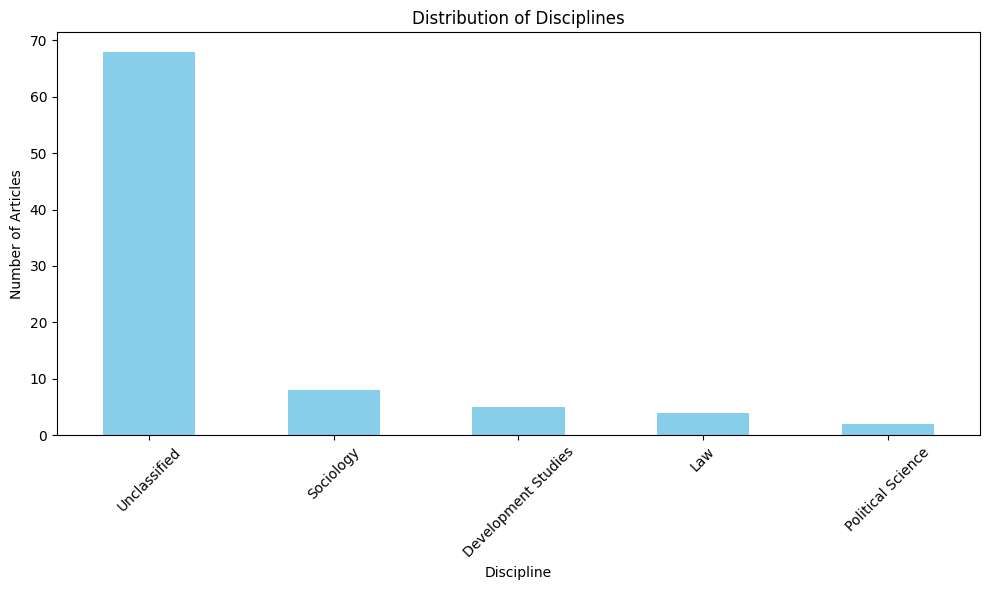

In [12]:
import matplotlib.pyplot as plt

#Assign existing dataframe
df = var_jlss_titles_disciplines_and_abstracts_df


# Discipline Distribution - Bar Chart
discipline_counts = df['Discipline'].value_counts()

plt.figure(figsize=(10, 6))
discipline_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Disciplines')
plt.xlabel('Discipline')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


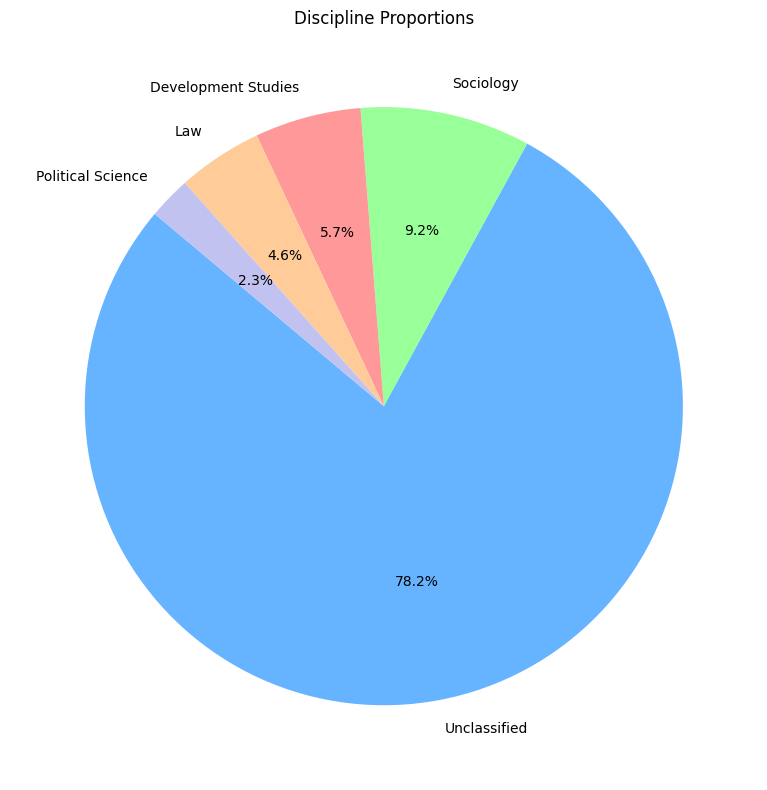

In [16]:
#Pie Chart for Discipline Distribution
plt.figure(figsize=(8, 8))
discipline_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140,
                       colors=['#66b3ff','#99ff99','#ff9999','#ffcc99','#c2c2f0'])
plt.title('Discipline Proportions')
plt.ylabel('')  # Remove y-label
plt.tight_layout()
plt.show()

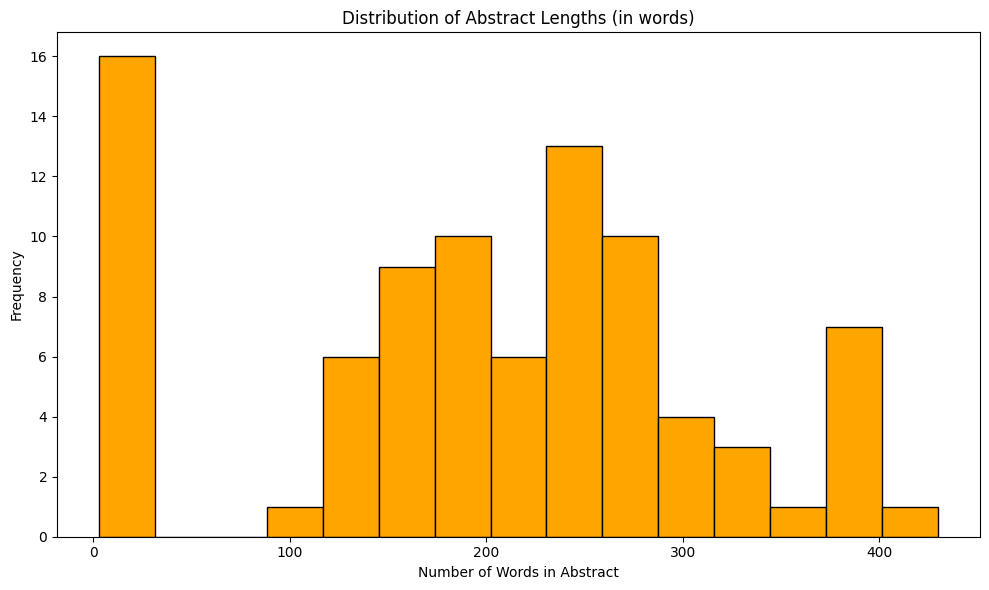

In [15]:
# Abstract Length Distribution - Histogram
df['Abstract_Length'] = df['Abstract'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
plt.hist(df['Abstract_Length'], bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Abstract Lengths (in words)')
plt.xlabel('Number of Words in Abstract')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## 2.5. Initial Findings Summary

###Dataset Overview

**Total records:** 88 journal articles from the Journal of Law and Social Sciences (JLSS).

**Extracted attributes:** Title, Article URL, PDF URL, Abstract, and Discipline.

###Missing Data

**Abstracts:**

Missing for 16 out of 88 articles (~18%).

Likely due to variations in PDF structure or absence of the “Abstract” section in some papers.

**Discipline:**

Missing for 67 out of 88 articles (~76%).

**Cause:** Discipline is not explicitly stated on the site and relies on keyword-based inference.

###Text Length Analysis

**Abstract lengths vary significantly:**

Most abstracts fall between 50–150 words.

A small proportion of abstracts are extremely short or missing.

###Discipline Distribution

Detected disciplines include Law, Sociology, and a few others.

However, the majority remain Unclassified, confirming the challenge of automatic detection.

###Implications

The dataset is suitable for text classification but requires:

Improved discipline detection techniques (e.g., advanced NLP, metadata use, or manual labeling).

Handling missing abstracts (either exclude or impute using other content).

###Next Steps

1. Enhance discipline inference with improved keyword sets, weighted scoring, and metadata extraction.

2. Consider manual annotation for records still unclassified.

3. Visualize word frequency in titles and abstracts to understand thematic distribution.

#3. Data Preparation

##3.1 Data cleaning
The first step is to handle missing or inconsistent data. Missing values can negatively affect model performance, so we need to decide whether to fill, drop, or otherwise handle them.

##3.2. Feature Engineering
Feature engineering can help extract useful information from existing data. For example, we can derive the length of abstracts or detect the presence of certain keywords.

##3.3 Data Transformation
Machine learning algorithms generally require numerical input. Categorical features like "Discipline" should be converted to numeric representations. We will use one-hot encoding for this purpose.